In [1]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
#import the titanic dataset
data = pd.read_csv("tested.csv")

In [4]:
#Display the first five rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Check out the null values, datatype of the data and more
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#Check out the summary statistics of the data 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


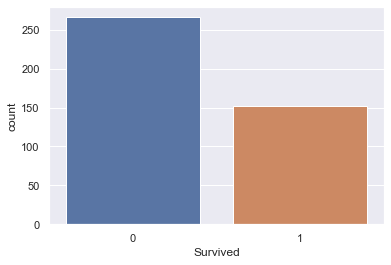

In [7]:
#Create a bar plot of titanic survival which is our target variable
sns.countplot(x='Survived', data=data);

<AxesSubplot:xlabel='Sex', ylabel='count'>

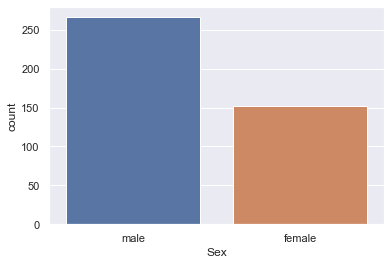

In [8]:
#Create a bar plot based on sex of the passengers
sns.countplot(x='Sex', data=data)

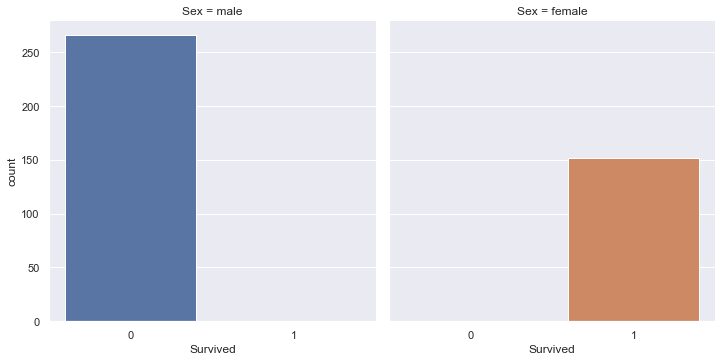

In [9]:
#Create a bar plot of the titanic survival dataset feature 'Survived' split over the feature 'Sex'
sns.catplot(x='Survived', col='Sex', kind='count', data=data);

In [10]:
#Let's see how many men and women survived
data.groupby(['Sex']).Survived.sum()

Sex
female    152
male        0
Name: Survived, dtype: int64

In [11]:
# Let's figure out the proportion of women that survived along with the proportion of men
print(data[data.Sex == 'female'].Survived.sum()/data[data.Sex == 'female'].Survived.count())
print(data[data.Sex == 'male'].Survived.sum()/data[data.Sex == 'male'].Survived.count())

1.0
0.0


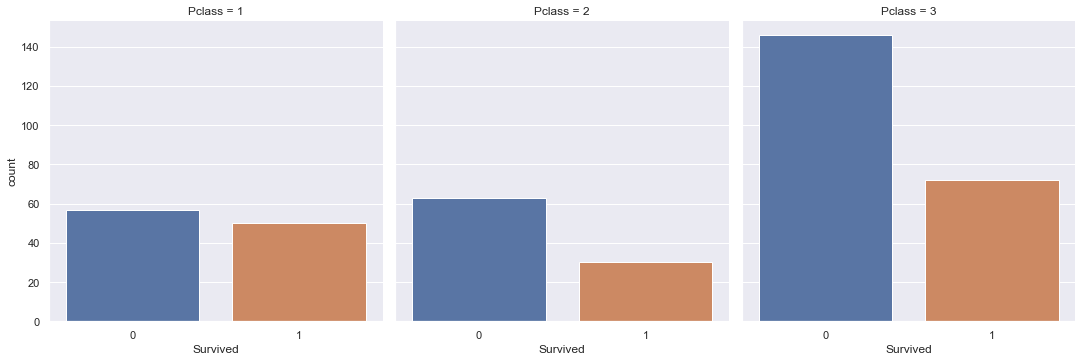

In [12]:
# Build bar plots of the titanic dataset feature 'Survived' split over the feature 'Pclass'
sns.catplot(x='Survived', col='Pclass', kind='count', data=data);

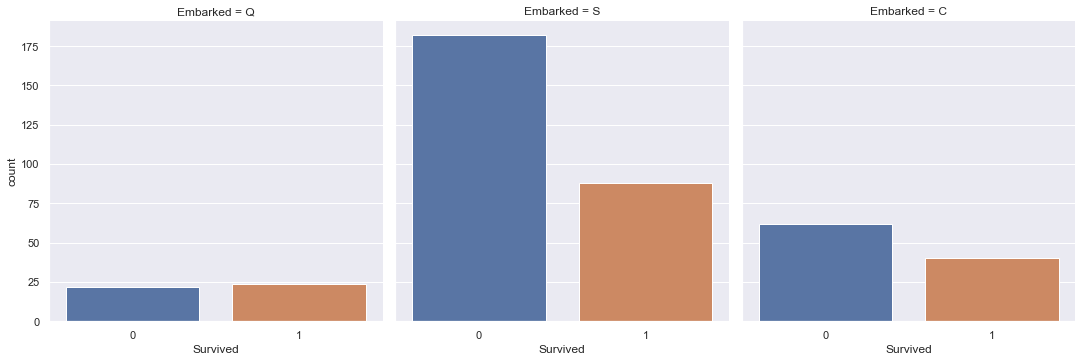

In [13]:
# Build bar plots of the titanic dataset feature 'Survived' split over the feature 'Embarked'
sns.catplot(x='Survived', col='Embarked', kind='count', data=data);

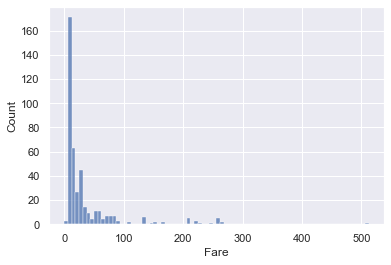

In [15]:
# Plot a histogram of the 'Fare' column of the dataset
sns.histplot(data.Fare, kde = False);

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

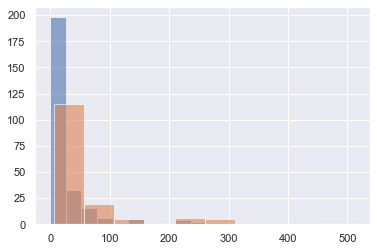

In [16]:
# Plot the column 'Fare' for each value of 'Survived' on the same plot
data.groupby('Survived').Fare.hist(alpha=0.6)

<AxesSubplot:xlabel='Age', ylabel='Count'>

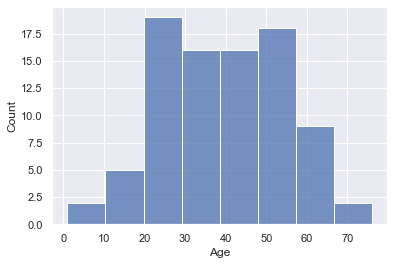

In [17]:
# Plot a histogram of the 'Age' column but before that we'll need to drop null values 
data_drop = data.dropna()
sns.histplot(data_drop.Age, kde = False)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

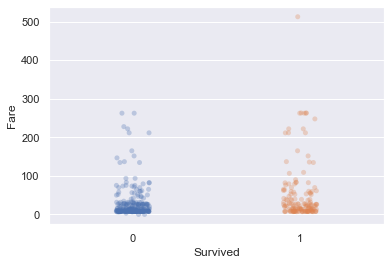

In [18]:
# Now, let's plot a strip plot and a violin plot of 'Fare' on the y-axis with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=data, alpha=0.3, jitter=True)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

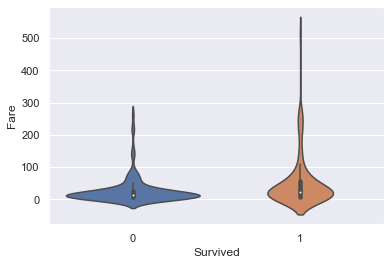

In [21]:
sns.violinplot(x='Survived', y='Fare', data=data)

In [22]:
# Check the summary statistics of 'Fare' as a function of survival
data.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,265.0,27.527877,41.079423,0.00,7.85420,13.0000,26.5500,262.3750
1,152.0,49.747699,73.108716,6.95,8.62605,21.5125,55.4417,512.3292


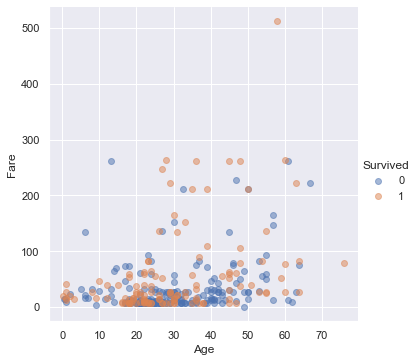

In [23]:
# Plot a scatter plot of 'Age' against 'Fare' colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=data, fit_reg=False, scatter_kws={'alpha': 0.5})

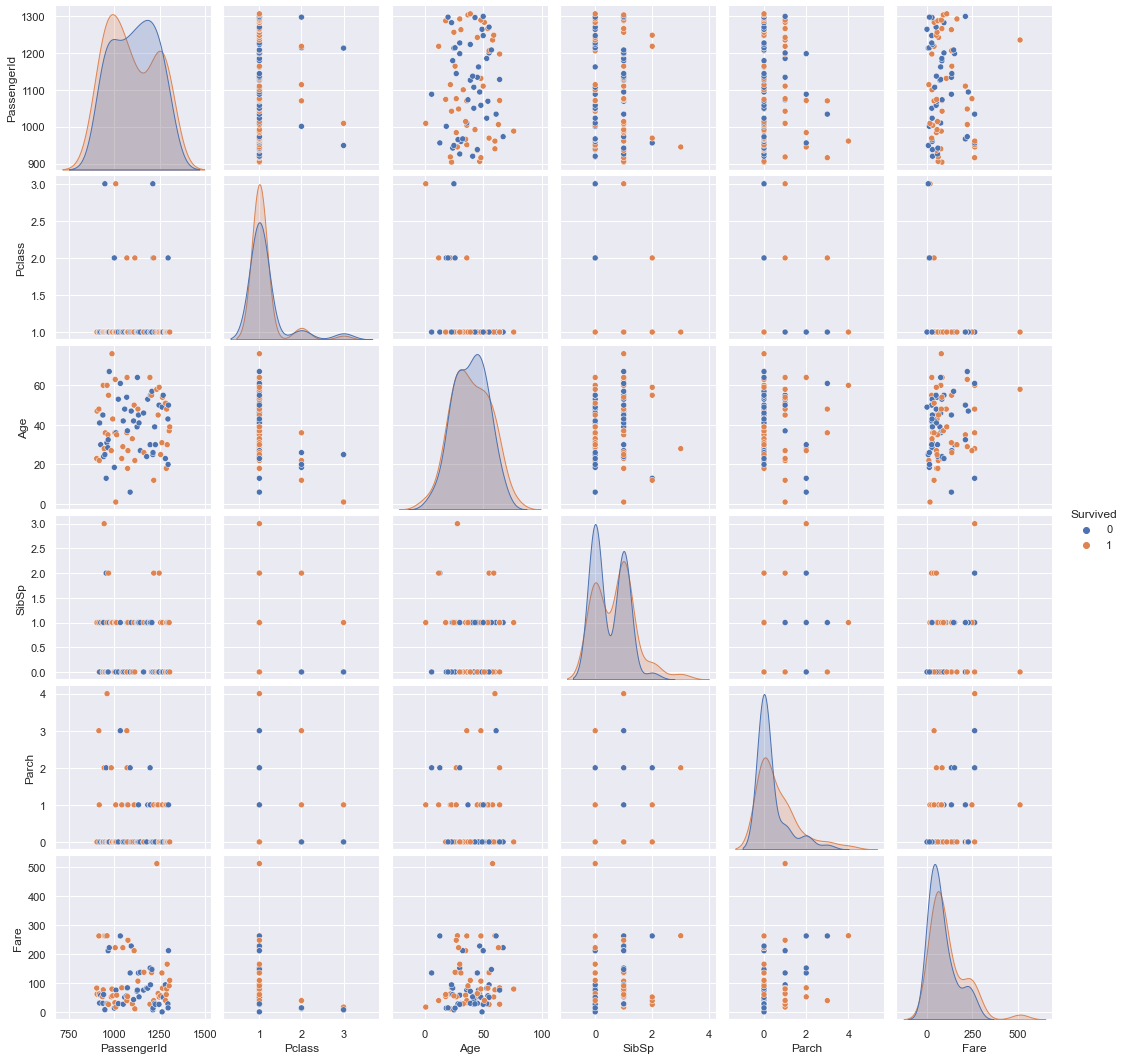

In [25]:
# Plot a pairplot colored by 'Survived'.A pairplot isa great way to display most of the information that you have already discovered in a single grid of plots
sns.pairplot(data_drop, hue='Survived');